In [216]:
import pandas as pd
df_1 = pd.read_csv("Datasets/Loan.csv")
df_1

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [217]:
df_1.drop(columns=["RiskScore", "ApplicationDate", "NetWorth", 'Experience', 'MonthlyIncome', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment'], axis=1, inplace=True)

In [218]:
df_1.columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus',
       'EducationLevel', 'LoanAmount', 'LoanDuration', 'MaritalStatus',
       'NumberOfDependents', 'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'UtilityBillsPaymentHistory', 'JobTenure', 'TotalDebtToIncomeRatio',
       'LoanApproved'],
      dtype='object')

In [219]:
# Separate categorical and numerical columns
categorical_columns = df_1.select_dtypes(include=['object', 'category']).columns
numerical_columns = df_1.select_dtypes(include=['int64', 'float64']).columns

print("\nNumerical Columns:")
print(numerical_columns)


Numerical Columns:
Index(['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration',
       'NumberOfDependents', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'UtilityBillsPaymentHistory', 'JobTenure',
       'TotalDebtToIncomeRatio', 'LoanApproved'],
      dtype='object')


In [220]:
print(categorical_columns)

Index(['EmploymentStatus', 'EducationLevel', 'MaritalStatus',
       'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')


In [221]:
unique_values_dict = {}

for i in df_1.columns:
    if df_1[i].dtype == "object":
        unique_values = pd.unique(df_1[i])
        unique_values_dict[i] = unique_values
        print(unique_values)
print(unique_values_dict)

['Employed' 'Self-Employed' 'Unemployed']
['Master' 'Associate' 'Bachelor' 'High School' 'Doctorate']
['Married' 'Single' 'Divorced' 'Widowed']
['Own' 'Mortgage' 'Rent' 'Other']
['Home' 'Debt Consolidation' 'Education' 'Other' 'Auto']
{'EmploymentStatus': array(['Employed', 'Self-Employed', 'Unemployed'], dtype=object), 'EducationLevel': array(['Master', 'Associate', 'Bachelor', 'High School', 'Doctorate'],
      dtype=object), 'MaritalStatus': array(['Married', 'Single', 'Divorced', 'Widowed'], dtype=object), 'HomeOwnershipStatus': array(['Own', 'Mortgage', 'Rent', 'Other'], dtype=object), 'LoanPurpose': array(['Home', 'Debt Consolidation', 'Education', 'Other', 'Auto'],
      dtype=object)}


In [222]:
from sklearn.preprocessing import LabelEncoder
encoding_map = {}
categorical_columns = [
    'EmploymentStatus',
    'EducationLevel',
    'MaritalStatus',
    'HomeOwnershipStatus',
    'LoanPurpose'
]
for col in categorical_columns:
    label_encoder = LabelEncoder()
    df_1[col] = label_encoder.fit_transform(df_1[col])
    encoding_map[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(df_1[categorical_columns].head())
for col, mapping in encoding_map.items():
    print(f"{col}: {mapping}")

   EmploymentStatus  EducationLevel  MaritalStatus  HomeOwnershipStatus  \
0                 0               4              1                    2   
1                 0               0              2                    0   
2                 0               1              1                    3   
3                 0               3              2                    0   
4                 0               0              1                    0   

   LoanPurpose  
0            3  
1            1  
2            2  
3            3  
4            1  
EmploymentStatus: {'Employed': 0, 'Self-Employed': 1, 'Unemployed': 2}
EducationLevel: {'Associate': 0, 'Bachelor': 1, 'Doctorate': 2, 'High School': 3, 'Master': 4}
MaritalStatus: {'Divorced': 0, 'Married': 1, 'Single': 2, 'Widowed': 3}
HomeOwnershipStatus: {'Mortgage': 0, 'Other': 1, 'Own': 2, 'Rent': 3}
LoanPurpose: {'Auto': 0, 'Debt Consolidation': 1, 'Education': 2, 'Home': 3, 'Other': 4}


In [223]:
df_1.isnull().sum()

Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
UtilityBillsPaymentHistory    0
JobTenure                     0
TotalDebtToIncomeRatio        0
LoanApproved                  0
dtype: int64

In [224]:
df_1.head(n=10)

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,...,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,UtilityBillsPaymentHistory,JobTenure,TotalDebtToIncomeRatio,LoanApproved
0,45,39948,617,0,4,13152,48,1,2,2,...,29,9,7632,1202,146111,19183,0.724972,11,0.181077,0
1,38,39709,628,0,0,26045,48,2,1,0,...,21,9,4627,3460,53204,9595,0.935132,3,0.389852,0
2,47,40724,570,0,1,17627,36,1,2,3,...,20,22,886,895,25176,128874,0.872241,6,0.462157,0
3,58,69084,545,0,3,37898,96,2,1,0,...,27,10,1675,1217,104822,5370,0.896155,5,0.313098,0
4,37,103264,594,0,0,9184,36,1,1,0,...,26,27,1555,4981,244305,17286,0.941369,5,0.070210,1
5,37,178310,626,1,4,15433,72,1,0,3,...,16,19,2118,1223,67914,40843,0.756079,5,0.075211,1
6,58,51250,564,0,3,12741,48,1,0,3,...,21,18,5161,1735,65624,43894,0.884275,5,0.170529,0
7,49,97345,516,0,3,19634,12,0,5,0,...,19,11,781,74,50177,11556,0.933492,5,0.260767,1
8,34,116841,603,0,1,55353,60,0,5,2,...,25,29,1157,708,29632,49940,0.728397,3,0.246509,0
9,46,40615,612,0,0,25443,12,1,4,1,...,23,10,1028,446,129664,12852,0.615323,3,0.903384,0


In [225]:
X = df_1.iloc[:, :-1]
X

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,...,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,UtilityBillsPaymentHistory,JobTenure,TotalDebtToIncomeRatio
0,45,39948,617,0,4,13152,48,1,2,2,...,0,29,9,7632,1202,146111,19183,0.724972,11,0.181077
1,38,39709,628,0,0,26045,48,2,1,0,...,0,21,9,4627,3460,53204,9595,0.935132,3,0.389852
2,47,40724,570,0,1,17627,36,1,2,3,...,0,20,22,886,895,25176,128874,0.872241,6,0.462157
3,58,69084,545,0,3,37898,96,2,1,0,...,0,27,10,1675,1217,104822,5370,0.896155,5,0.313098
4,37,103264,594,0,0,9184,36,1,1,0,...,0,26,27,1555,4981,244305,17286,0.941369,5,0.070210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,30180,587,0,3,24521,36,1,3,3,...,0,21,7,235,3429,80969,25642,0.826217,1,0.627741
19996,56,49246,567,0,0,25818,36,1,5,3,...,0,30,28,6910,183,69571,5569,0.816618,3,0.334418
19997,44,48958,645,0,1,37033,72,1,3,0,...,0,28,8,2175,746,108316,4653,0.887216,3,0.357227
19998,60,41025,560,0,3,14760,72,1,3,2,...,0,17,13,3037,260,22085,11485,0.843787,5,0.408678


In [226]:
Y = df_1.iloc[:, -1]

In [227]:
Y

0        0
1        0
2        0
3        0
4        1
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: LoanApproved, Length: 20000, dtype: int64

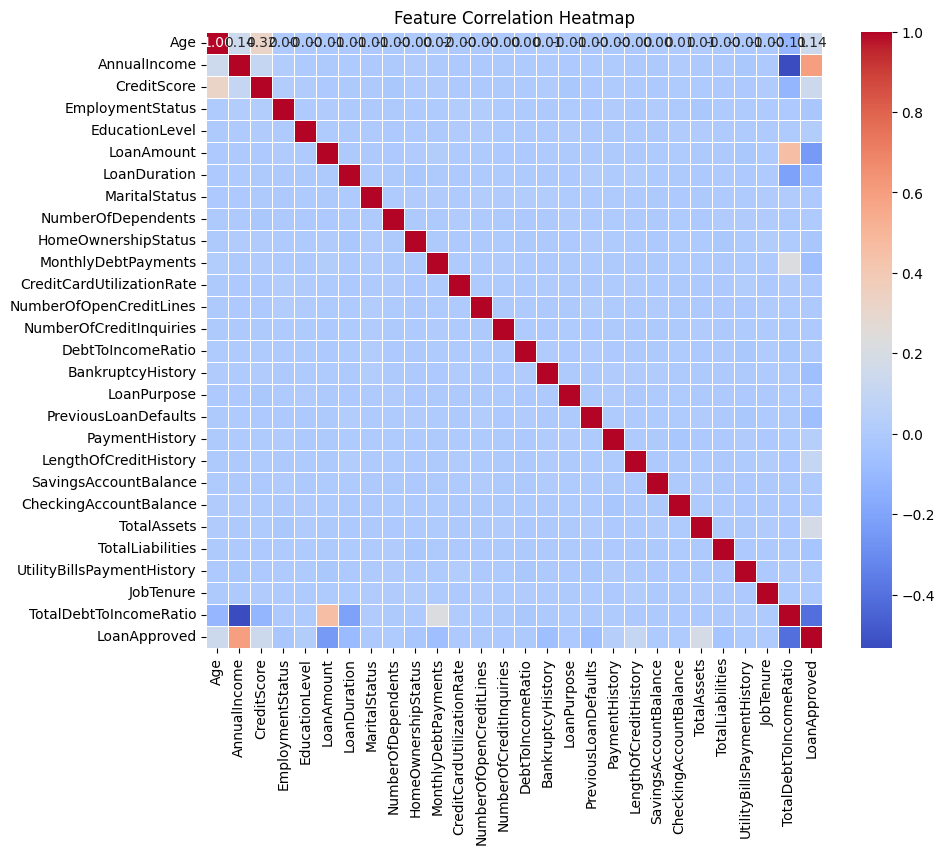

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr = df_1.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create heatmap with correlation values
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)

# Add a title
plt.title("Feature Correlation Heatmap")

# Display the plot
plt.show()

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, classification_report

In [231]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
}

In [232]:
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(Y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(Y_test, y_pred))
    print("-" * 50)

C:\Users\sreec\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8945
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2983
           1       0.84      0.72      0.78      1017

    accuracy                           0.89      4000
   macro avg       0.87      0.84      0.85      4000
weighted avg       0.89      0.89      0.89      4000

--------------------------------------------------
Random Forest Accuracy: 0.9090
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2983
           1       0.88      0.75      0.81      1017

    accuracy                           0.91      4000
   macro avg       0.90      0.86      0.87      4000
weighted avg       0.91      0.91      0.91      4000

--------------------------------------------------
Gradient Boosting Accuracy: 0.9255
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2983
           1       0.89      0.8

In [233]:
import joblib

joblib.dump(models["Gradient Boosting"], "Gradient_Boosting.pkl")

['Gradient_Boosting.pkl']

In [234]:
loaded_model = joblib.load("Gradient_Boosting.pkl")

In [235]:
encoding_map

{'EmploymentStatus': {'Employed': 0, 'Self-Employed': 1, 'Unemployed': 2},
 'EducationLevel': {'Associate': 0,
  'Bachelor': 1,
  'Doctorate': 2,
  'High School': 3,
  'Master': 4},
 'MaritalStatus': {'Divorced': 0, 'Married': 1, 'Single': 2, 'Widowed': 3},
 'HomeOwnershipStatus': {'Mortgage': 0, 'Other': 1, 'Own': 2, 'Rent': 3},
 'LoanPurpose': {'Auto': 0,
  'Debt Consolidation': 1,
  'Education': 2,
  'Home': 3,
  'Other': 4}}

In [236]:
import joblib
import pandas as pd

# Load the model
model_gradient_boosting = joblib.load("Gradient_Boosting.pkl")

# Original sample input (with categorical values)
sample_input = {
    'Age': 32,
    'AnnualIncome': 85000,
    'CreditScore': 750,
    'EmploymentStatus': 'Employed',  # Categorical
    'EducationLevel': 'Bachelor',  # Categorical
    'LoanAmount': 20000,
    'LoanDuration': 48,
    'MaritalStatus': 'Married',  # Categorical
    'NumberOfDependents': 2,
    'HomeOwnershipStatus': 'Own',  # Categorical
    'MonthlyDebtPayments': 1500,
    'CreditCardUtilizationRate': 0.32,
    'NumberOfOpenCreditLines': 4,
    'NumberOfCreditInquiries': 1,
    'DebtToIncomeRatio': 0.40,
    'BankruptcyHistory': 0,
    'LoanPurpose': 'Debt Consolidation',  # Categorical
    'PreviousLoanDefaults': 0,
    'PaymentHistory': 0.96,
    'LengthOfCreditHistory': 8,
    'SavingsAccountBalance': 12000,
    'CheckingAccountBalance': 4000,
    'TotalAssets': 180000,
    'TotalLiabilities': 60000,
    'UtilityBillsPaymentHistory': 0.90,
    'JobTenure': 6,
    'TotalDebtToIncomeRatio': 0.45
}

# ✅ Encoding mappings
encoding_map = {
    'EmploymentStatus': {'Employed': 0, 'Self-Employed': 1, 'Unemployed': 2},
    'EducationLevel': {'Associate': 0, 'Bachelor': 1, 'Doctorate': 2, 'High School': 3, 'Master': 4},
    'MaritalStatus': {'Divorced': 0, 'Married': 1, 'Single': 2, 'Widowed': 3},
    'HomeOwnershipStatus': {'Mortgage': 0, 'Other': 1, 'Own': 2, 'Rent': 3},
    'LoanPurpose': {'Auto': 0, 'Debt Consolidation': 1, 'Education': 2, 'Home': 3, 'Other': 4}
}

def reverse_mapping(mapping):
    return {v: k for k, v in mapping.items()}

encoded_input = sample_input.copy()
for col, mapping in encoding_map.items():
    encoded_input[col] = mapping[sample_input[col]]

decoded_input = encoded_input.copy()
for col, mapping in encoding_map.items():
    decoded_input[col] = reverse_mapping(mapping)[encoded_input[col]]

print("\n Original Input:")
print(sample_input)
print("\n Encoded Input:")
print(encoded_input)
print("\n Decoded Input:")
print(decoded_input)

input_df = pd.DataFrame([encoded_input])

prediction = model_gradient_boosting.predict(input_df)

result_map = {0: 'Rejected', 1: 'Approved'}
decoded_prediction = result_map[prediction[0]]

print("\n🎯 Prediction:")
print(f"Predicted outcome (raw): {prediction[0]}")
print(f"Decoded outcome: {decoded_prediction}")


 Original Input:
{'Age': 32, 'AnnualIncome': 85000, 'CreditScore': 750, 'EmploymentStatus': 'Employed', 'EducationLevel': 'Bachelor', 'LoanAmount': 20000, 'LoanDuration': 48, 'MaritalStatus': 'Married', 'NumberOfDependents': 2, 'HomeOwnershipStatus': 'Own', 'MonthlyDebtPayments': 1500, 'CreditCardUtilizationRate': 0.32, 'NumberOfOpenCreditLines': 4, 'NumberOfCreditInquiries': 1, 'DebtToIncomeRatio': 0.4, 'BankruptcyHistory': 0, 'LoanPurpose': 'Debt Consolidation', 'PreviousLoanDefaults': 0, 'PaymentHistory': 0.96, 'LengthOfCreditHistory': 8, 'SavingsAccountBalance': 12000, 'CheckingAccountBalance': 4000, 'TotalAssets': 180000, 'TotalLiabilities': 60000, 'UtilityBillsPaymentHistory': 0.9, 'JobTenure': 6, 'TotalDebtToIncomeRatio': 0.45}

 Encoded Input:
{'Age': 32, 'AnnualIncome': 85000, 'CreditScore': 750, 'EmploymentStatus': 0, 'EducationLevel': 1, 'LoanAmount': 20000, 'LoanDuration': 48, 'MaritalStatus': 1, 'NumberOfDependents': 2, 'HomeOwnershipStatus': 2, 'MonthlyDebtPayments': 150